In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Define the data generators for training, validation, and testing
train_dir = '../MajorProject/DataSet/train'
val_dir = '../MajorProject/DataSet/val'
test_dir = '../MajorProject/DataSet/test'
img_size = (224, 224)
batch_size = 32

In [4]:
def sample_image(image_path):
    img = load_img(image_path)
    print((img_to_array(img)).shape)
    plt.imshow(img)
    plt.show()

NORMAL X-ray
(1040, 1272, 3)


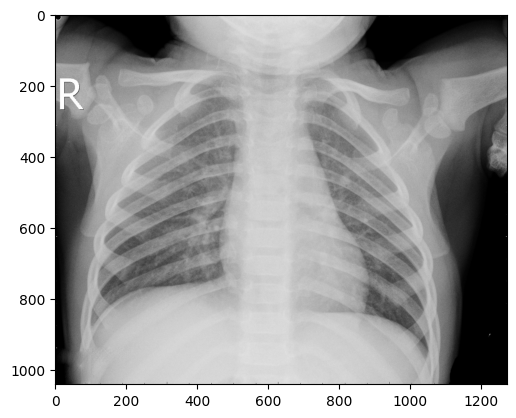

COVID19 X-ray
(1333, 1118, 3)


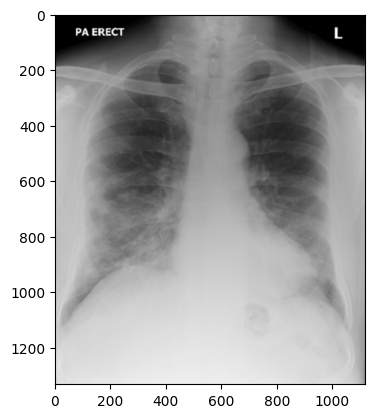

Pneumonia X-ray
(944, 1416, 3)


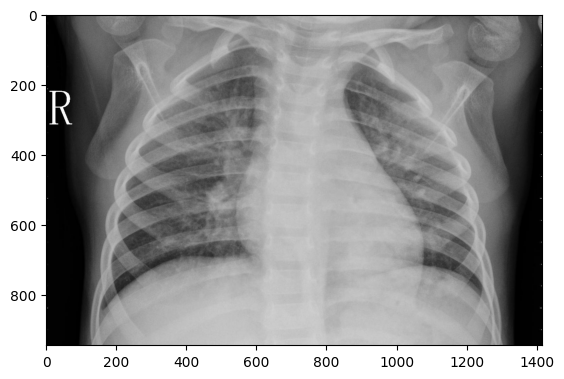

TUBERCULOSIS X-ray
(512, 512, 3)


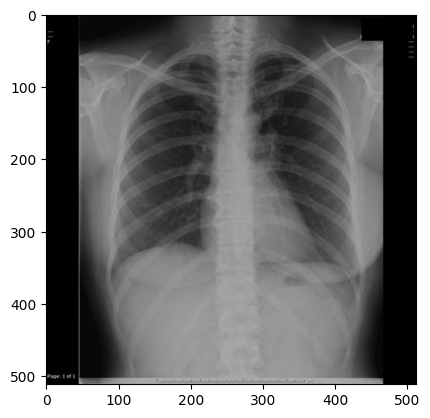

In [5]:
print("NORMAL X-ray")
image_path = "/Users/apple/Desktop/MajorProject/DataSet/val/NORMAL/NORMAL2-IM-1430-0001.jpeg"
sample_image(image_path)
print("COVID19 X-ray")
image_path = "/Users/apple/Desktop/MajorProject/DataSet/val/COVID19/COVID19(566).jpg"
sample_image(image_path)
print("Pneumonia X-ray")
image_path = "/Users/apple/Desktop/MajorProject/DataSet/val/PNEUMONIA/person1949_bacteria_4880.jpeg"
sample_image(image_path)
print("TUBERCULOSIS X-ray")
image_path = "/Users/apple/Desktop/MajorProject/DataSet/val/TURBERCULOSIS/Tuberculosis-651.png"
sample_image(image_path)

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=img_size,
                                                   batch_size=batch_size,
                                                   class_mode='categorical')

Found 6326 images belonging to 4 classes.
Found 38 images belonging to 4 classes.
Found 771 images belonging to 4 classes.


In [7]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [9]:
# Train the model
epochs = 50
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)

Epoch 1/50
197/197 [==============================] - 409s 2s/step - loss: 0.7122 - accuracy: 0.7199 - val_loss: 1.1027 - val_accuracy: 0.6250
Epoch 2/50
197/197 [==============================] - 361s 2s/step - loss: 0.5139 - accuracy: 0.8019 - val_loss: 0.9940 - val_accuracy: 0.6250
Epoch 3/50
197/197 [==============================] - 366s 2s/step - loss: 0.4525 - accuracy: 0.8279 - val_loss: 0.6531 - val_accuracy: 0.7188
Epoch 4/50
197/197 [==============================] - 369s 2s/step - loss: 0.4159 - accuracy: 0.8438 - val_loss: 1.2695 - val_accuracy: 0.5625
Epoch 5/50
197/197 [==============================] - 370s 2s/step - loss: 0.3911 - accuracy: 0.8481 - val_loss: 0.8688 - val_accuracy: 0.6562
Epoch 6/50
197/197 [==============================] - 358s 2s/step - loss: 0.3819 - accuracy: 0.8537 - val_loss: 0.6594 - val_accuracy: 0.7188
Epoch 7/50
197/197 [==============================] - 368s 2s/step - loss: 0.3363 - accuracy: 0.8692 - val_loss: 0.7067 - val_accuracy: 0.6875

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)

24/24 [==============================] - 14s 570ms/step - loss: 0.2750 - accuracy: 0.9167
Test accuracy: 0.9166666865348816


In [12]:
# Make predictions on new x-ray images
import numpy as np
from tensorflow.keras.preprocessing import image

In [13]:
img_path = '/Users/apple/Desktop/MajorProject/DataSet/val/NORMAL/NORMAL2-IM-1431-0001.jpeg'
img = image.load_img(img_path, target_size=img_size)
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

preds = model.predict(img_tensor)
print('Predictions:', preds)

1/1 [==============================] - 0s 120ms/step
Predictions: [[3.5262294e-06 1.1795704e-01 8.8203937e-01 9.2082057e-11]]


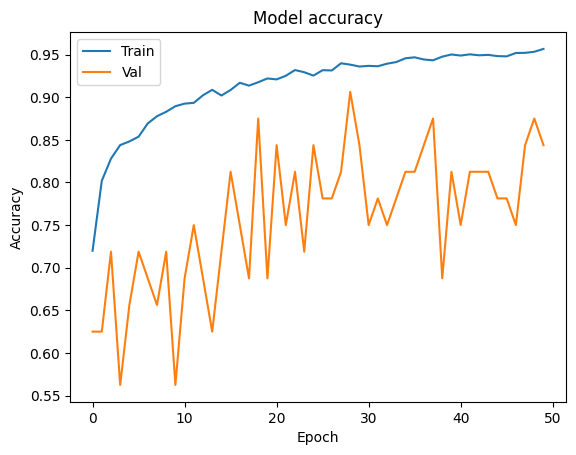

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

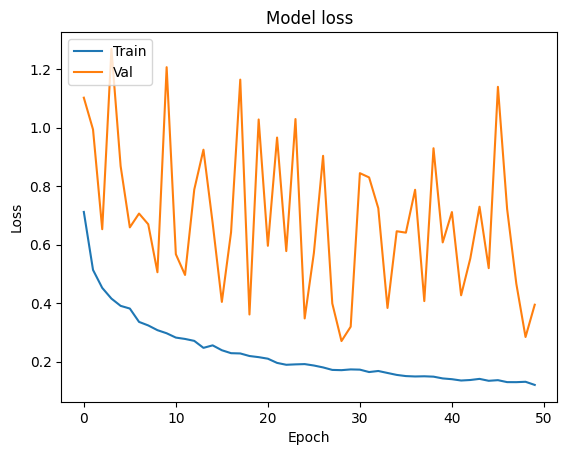

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

25/25 [==============================] - 13s 506ms/step
               precision    recall  f1-score   support

      COVID19       0.14      0.13      0.14       106
       NORMAL       0.28      0.24      0.26       234
    PNEUMONIA       0.49      0.54      0.51       390
TURBERCULOSIS       0.00      0.00      0.00        41

     accuracy                           0.37       771
    macro avg       0.23      0.23      0.23       771
 weighted avg       0.35      0.37      0.36       771



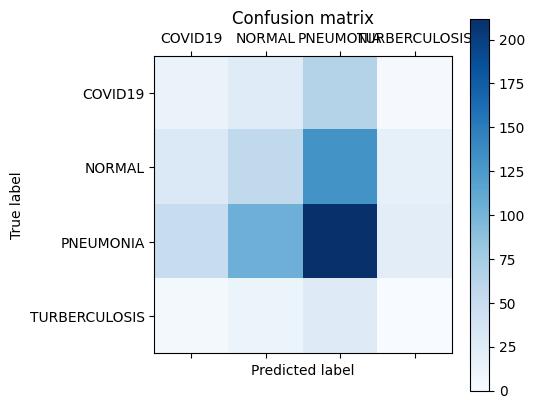

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(test_generator)

# Get the true labels
y_true = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Generate and print classification report
report = classification_report(y_true, np.argmax(y_pred, axis=1), target_names=class_labels)
print(report)

# Generate and plot confusion matrix
conf_mat = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
plt.matshow(conf_mat, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.show()

In [20]:
print("Accuracy:", history.history['accuracy'][-1])
CNNAccuracy = test_acc
AccuracyCNN = history.history['accuracy'][-1]
print(CNNAccuracy)
print(AccuracyCNN)

Accuracy: 0.9566253423690796
0.9166666865348816
0.9566253423690796


In [2]:
import tensorflow as tf

# Load data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/apple/Desktop/MajorProject/DataSet/train',
    image_size=(224, 224),
    batch_size=32
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/Users/apple/Desktop/MajorProject/DataSet/test',
    image_size=(224, 224),
    batch_size=32
)

# Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train model
history = model.fit(train_data, epochs=10, validation_data=test_data)

# Print accuracy
print("Accuracy:", history.history['accuracy'][-1])

Found 6326 files belonging to 4 classes.
Found 771 files belonging to 4 classes.
Epoch 1/10
198/198 [==============================] - 73s 359ms/step - loss: 3231.0593 - accuracy: 0.7256 - val_loss: 616.0551 - val_accuracy: 0.7484
Epoch 2/10
198/198 [==============================] - 61s 302ms/step - loss: 376.0686 - accuracy: 0.8400 - val_loss: 462.0531 - val_accuracy: 0.7691
Epoch 3/10
198/198 [==============================] - 66s 325ms/step - loss: 268.7841 - accuracy: 0.8236 - val_loss: 320.1125 - val_accuracy: 0.6913
Epoch 4/10
198/198 [==============================] - 78s 387ms/step - loss: 61.0864 - accuracy: 0.8426 - val_loss: 97.4069 - val_accuracy: 0.7367
Epoch 5/10
198/198 [==============================] - 73s 360ms/step - loss: 28.8704 - accuracy: 0.8524 - val_loss: 52.4784 - val_accuracy: 0.5772
Epoch 6/10
198/198 [==============================] - 63s 310ms/step - loss: 39.0927 - accuracy: 0.6459 - val_loss: 1.4159 - val_accuracy: 0.5266
Epoch 7/10
198/198 [===========

In [3]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_data)
print("Testing Accuracy:", test_acc)

25/25 [==============================] - 5s 145ms/step - loss: 1.1152 - accuracy: 0.5305
Testing Accuracy: 0.530479907989502


FNN Training Accuracy : 65.77616333961487
FNN Testing Accuracy : 53.047990798950195
CNN Training Accuracy : 95.66253423690796
CNN Testing Accuracy : 91.66666865348816


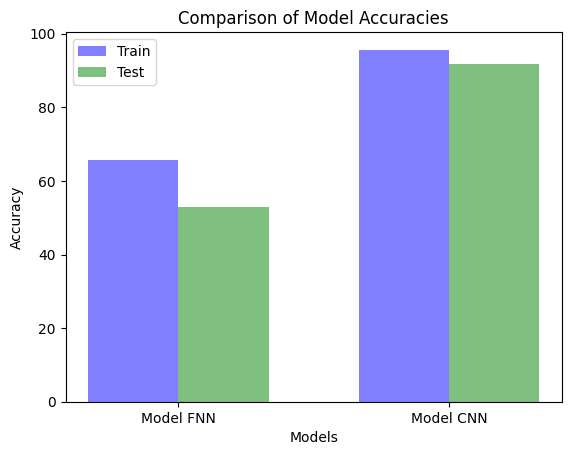

In [4]:
import matplotlib.pyplot as plt

# Define the data for the two models
FNN_train_acc = history.history['accuracy'][-1] 
FNN_test_acc = test_acc
CNN_train_acc = 0.9566253423690796
CNN_test_acc = 0.9166666865348816

print("FNN Training Accuracy :", FNN_train_acc * 100)
print("FNN Testing Accuracy :", FNN_test_acc * 100)
print("CNN Training Accuracy :", CNN_train_acc * 100)
print("CNN Testing Accuracy :", CNN_test_acc * 100)
# Define the labels and positions for the bars
model_labels = ['Model FNN', 'Model CNN']
y = []
bar_positions_train = [0, 1.5]
bar_positions_test = [0.5, 2]

# Define the heights of the bars
train_accs = [FNN_train_acc * 100, CNN_train_acc * 100]
test_accs = [FNN_test_acc * 100, CNN_test_acc * 100]

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the train accuracy bars
ax.bar(bar_positions_train, train_accs, width=0.5, color='blue', alpha=0.5, label='Train')

# Create the test accuracy bars
ax.bar(bar_positions_test, test_accs, width=0.5, color='green', alpha=0.5, label='Test')

# Add labels and titles to the graph
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks([0.25, 1.75])
ax.set_xticklabels(model_labels)
ax.legend()
# Display the graph
plt.show()
